# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nbformat
from nbconvert import HTMLExporter
import copy
import os
from IPython.display import display, Javascript
import seaborn as sns


# How to use
This is a notebook to compare and visualize results of two benchamrks of the same type.
To perform the analysis please provide a benchamrk results csv files paths as a `path1` and `path2` in User input section. You can also specify a name of resulting HTML file as a `filename` in the same section and name the benchmarks by modifying `benchmark_1_name` and `benchmark_2_name`. To perform the analysis provide the neccessary user input and run the notebook. The results will be converted to HTML and saved in `data_analysis_results` folder. You can convert the given HTML to PDF in your browser to add notes and comments

# User input

## Defining benchmark file path

In [2]:
path1 = "benchmark_results/2024-11-12_20-31-08/small_automatic_benchmark_results_2024-11-12_20-31-08.csv"
path2 = "benchmark_results/2024-11-08_15-34-06/test.csv"

## (optional) Define data analysis file name

In [3]:
benchmark_1_name = "optimized get next trips"
benchmark_2_name = "old metchod"
filename = None

In [4]:
if benchmark_1_name is None:
    benchmark_1_name = path1.split("/")[-1]
    benchmark_1_name = benchmark_1_name.split(".")[0]
if benchmark_2_name is None:
    benchmark_2_name = path2.split("/")[-1]
    benchmark_2_name = benchmark_2_name.split(".")[0]
if filename is None:
    filename = benchmark_1_name + "_vs_" + benchmark_2_name + "_analysis"

# Preprocessing

In [5]:
def time_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60

def seconds_to_miliseconds(seconds):
    return seconds * 1000

In [6]:
def process_df(df1):
    df1['found route duration (min)'] = df1['found route duration'].apply(time_to_minutes)
    df1['Label'] = df1['Start name'] + ' -> ' + df1['Destination Name'] + '\n (' + df1['Start Time'] + ' '+ df1['Day of week'] + ')'
    df1['get_next_trips_time_total'] = df1['get_next_trips_time_total'].apply(seconds_to_miliseconds)
    df1['plan_compute_heurstic_time_total'] = df1['plan_compute_heurstic_time_total'].apply(seconds_to_miliseconds)
    df1['plan_compute_actual_time_total'] = df1['plan_compute_actual_time_total'].apply(seconds_to_miliseconds)
    df1['find_plans_time_total'] = df1['find_plans_time_total'].apply(seconds_to_miliseconds)
    df1['planner_initialization_time'] = df1['planner_initialization_time'].apply(seconds_to_miliseconds)
    df1['start_walking_times_time'] = df1['start_walking_times_time'].apply(seconds_to_miliseconds)
    df1['destination_walking_times_time'] = df1['destination_walking_times_time'].apply(seconds_to_miliseconds)
    df1['precomputed_heurisitc_times_time'] = df1['precomputed_heurisitc_times_time'].apply(seconds_to_miliseconds)
    return df1

In [7]:
df1 = pd.read_csv(path1, encoding = "ISO-8859-2")
df2 = pd.read_csv(path2, encoding = "ISO-8859-2")

df1 = process_df(df1)
df2 = process_df(df2)

df1['difference (min)'] = df2['found route duration (min)'] - df1['found route duration (min)']
df1['difference_find_plans_time'] = df2['find_plans_time_total'] - df1['find_plans_time_total']

num_rows = len(df1)
fig_height = num_rows / 3.8


# Plots

In [8]:
def compare_columns(column_name, title, xlabel, ax, show_labels=True):
    label_column='Label'
    ylabel='Route',
    df1[f'difference_{column_name}'] = df2[column_name] - df1[column_name]

    df1['Label'] = df1[label_column]

    bars = ax.barh(df1['Label'], df1[f'difference_{column_name}'].fillna(0), color=['green' if x > 0 else 'red' if x < 0 else 'gray' for x in df1[f'difference_{column_name}'].fillna(0)], linewidth=1.5)

    for bar in bars:
        bar.set_edgecolor('white')
        bar.set_linewidth(1)
        bar.set_path_effects([])
        bar.set_clip_on(False)
        bar.set_capstyle('round')

    if show_labels:
        #ax.set_ylabel(ylabel)
        ax.set_yticklabels(df1['Label'], fontsize=8)
    else:
        ax.set_yticklabels([])

    ax.set_xlabel(xlabel)
    ax.set_title(title)

    for i, (bar, diff) in enumerate(zip(bars, df1[f'difference_{column_name}'])):
        xval = bar.get_width()
        offset = 0 
        color = 'green' if xval > 0 else 'red' if xval < 0 else 'gray'
        if pd.isna(diff):
            ax.text(0, bar.get_y() + bar.get_height()/2, 'NA', ha='center', va='center', color='black', fontsize=10, fontweight='bold')
        #else:
            #if xval > 0:
             #   ax.text(xval + offset, bar.get_y() + bar.get_height()/2, round(xval), ha='left', va='center', color='black', fontsize=10, fontweight='bold')
            #else:
             #   ax.text(xval - offset, bar.get_y() + bar.get_height()/2, round(xval), ha='right', va='center', color='black', fontsize=10, fontweight='bold')

    ax.grid(axis='x', linestyle='--', alpha=0.7)

## Performance comparison

C:\Users\User\AppData\Local\Temp\ipykernel_18136\2223242385.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df1['Label'], fontsize=8)
C:\Users\User\AppData\Local\Temp\ipykernel_18136\2223242385.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df1['Label'], fontsize=8)
C:\Users\User\AppData\Local\Temp\ipykernel_18136\2223242385.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df1['Label'], fontsize=8)


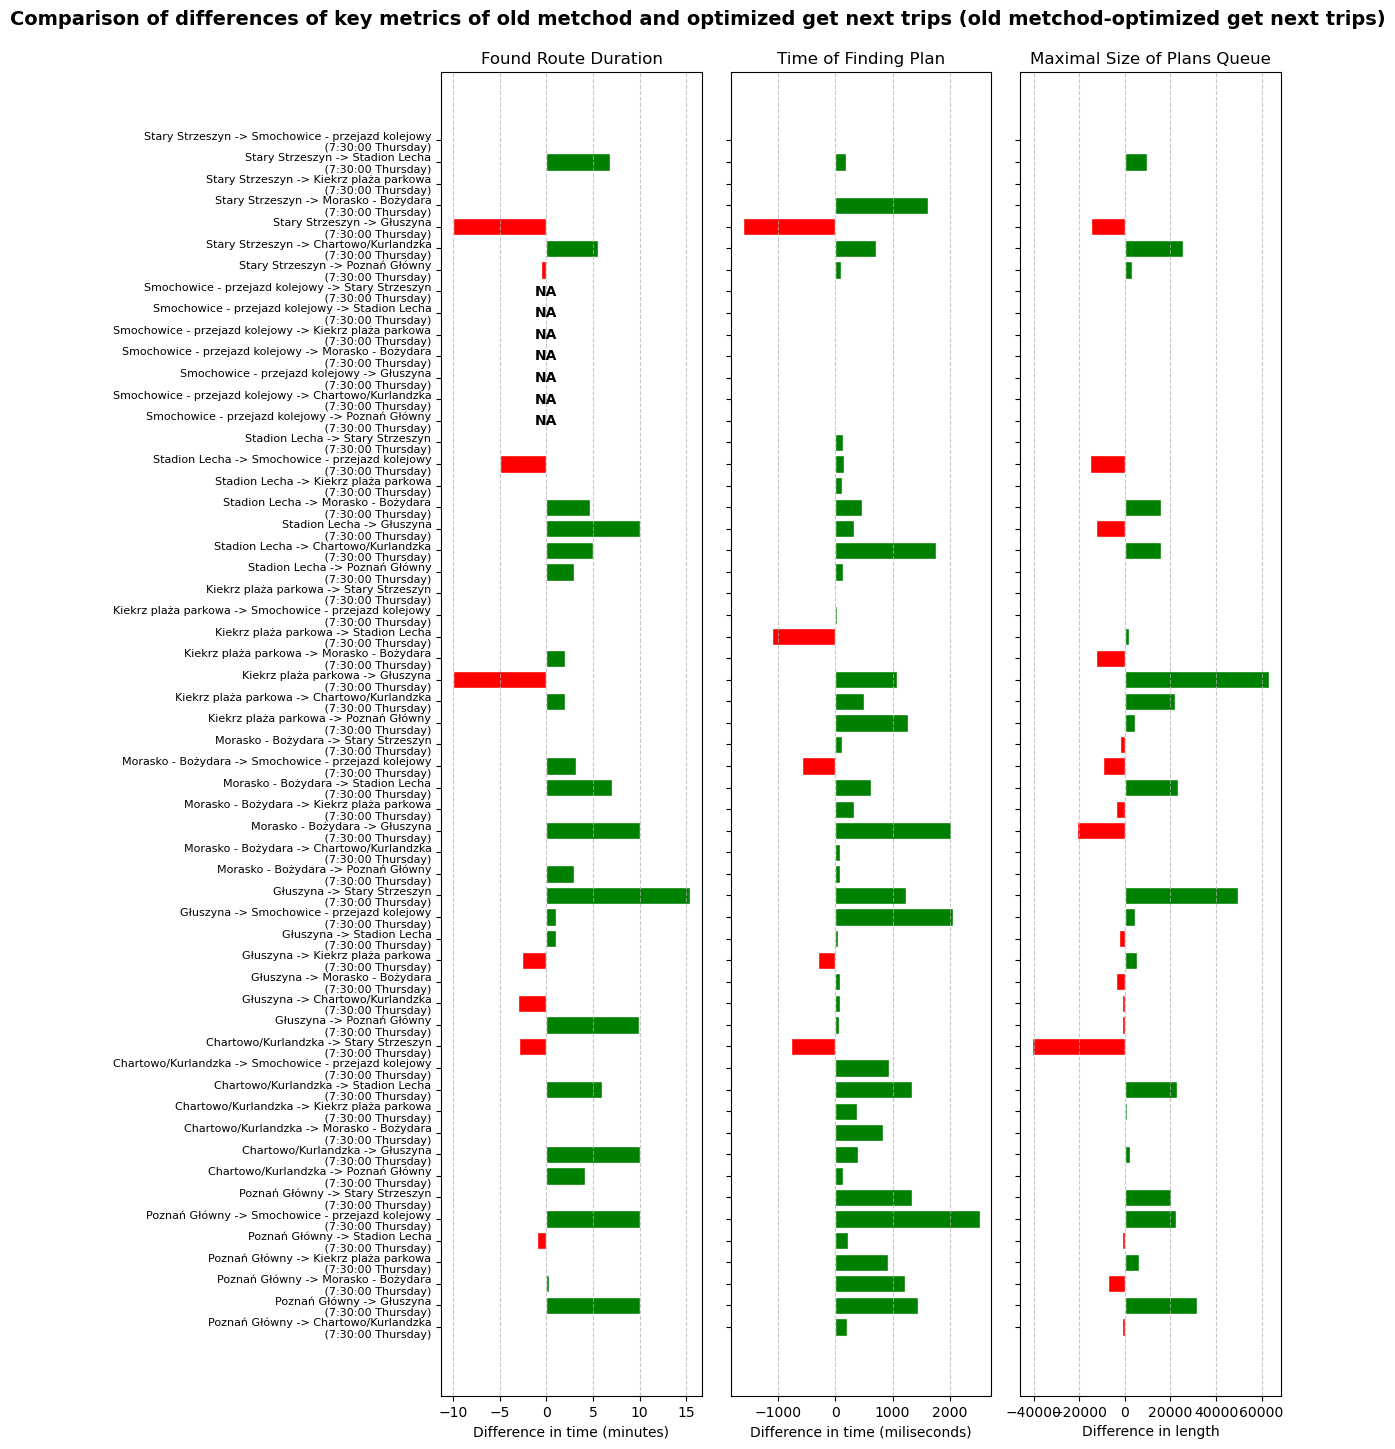

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, fig_height), sharey=True)
compare_columns(
    column_name='found route duration (min)', 
    title='Found Route Duration', 
    xlabel='Difference in time (minutes)', 
    ax=axes[0],
)

compare_columns( 
    column_name='find_plans_time_total', 
    title='Time of Finding Plan', 
    xlabel='Difference in time (miliseconds)', 
    ax=axes[1],
)

compare_columns( 
    column_name='plans_queue_max_size', 
    title='Maximal Size of Plans Queue', 
    xlabel='Difference in length', 
    ax=axes[2],
)

fig.suptitle(f'Comparison of differences of key metrics of {benchmark_2_name} and {benchmark_1_name} ({benchmark_2_name}-{benchmark_1_name})\n', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Searching time components

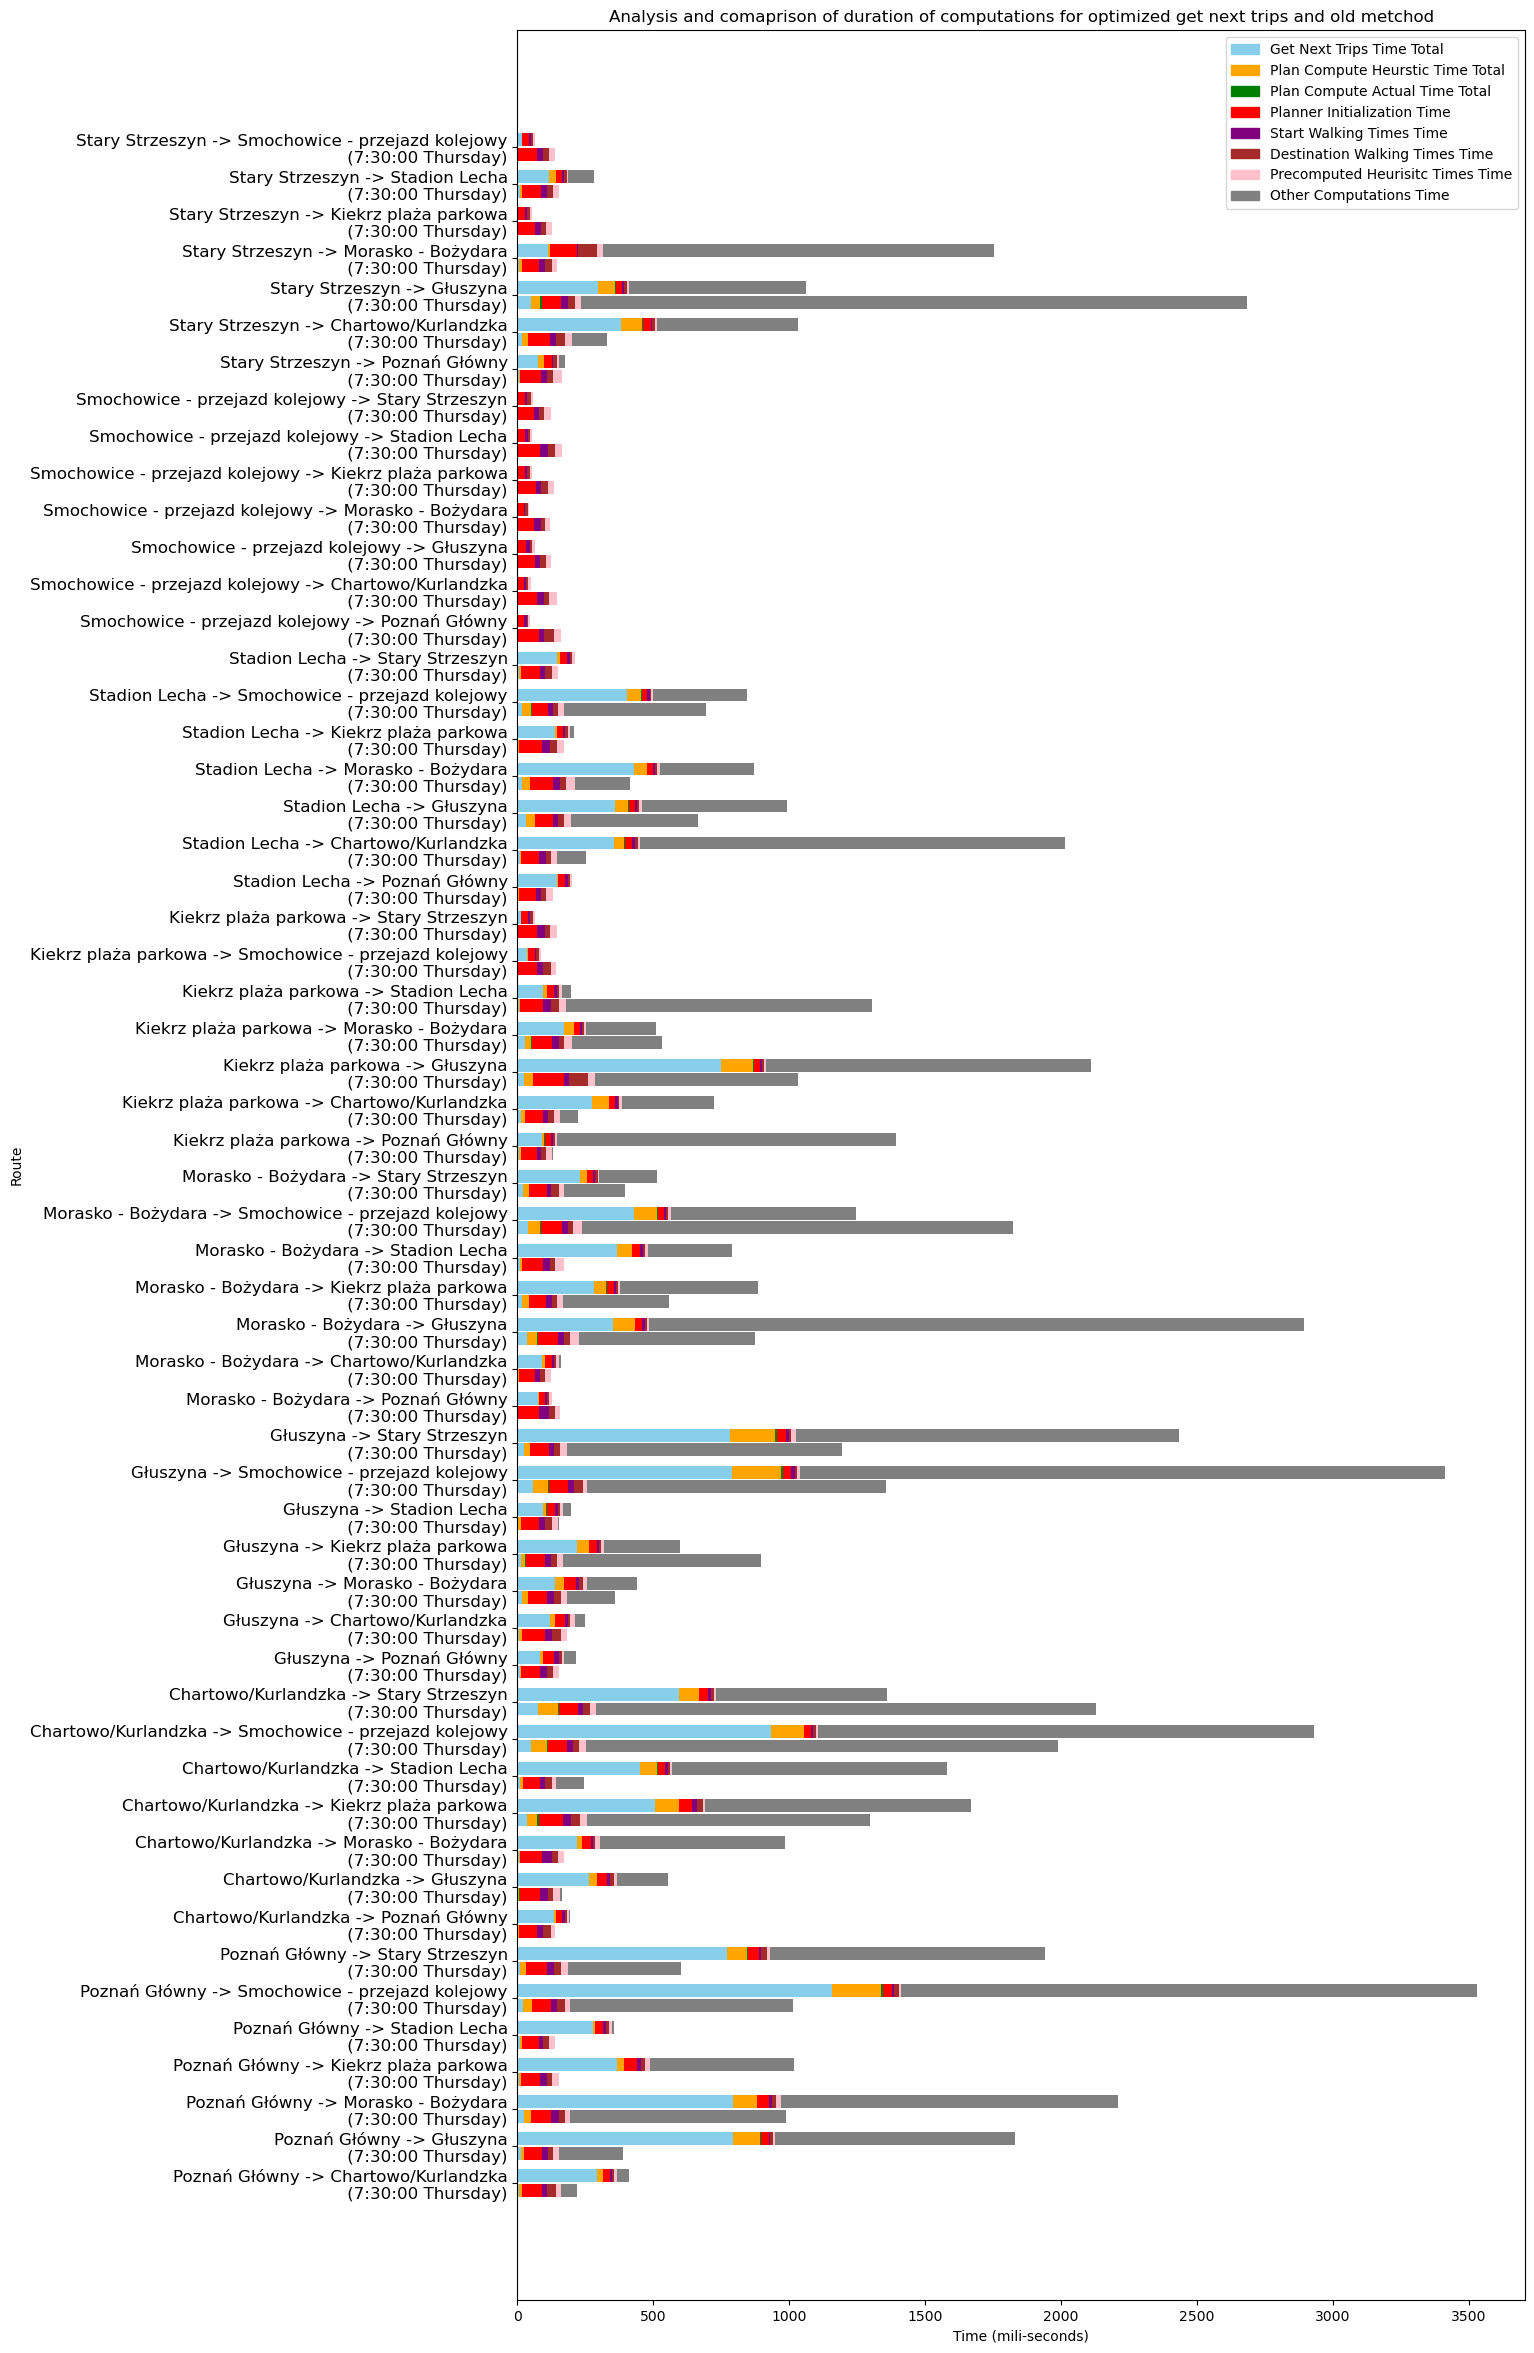

In [10]:
# Define the columns to be used
columns = [
    'get_next_trips_time_total',
    'plan_compute_heurstic_time_total',
    'plan_compute_actual_time_total',
    'planner_initialization_time',
    'start_walking_times_time',
    'destination_walking_times_time',
    'precomputed_heurisitc_times_time'
]

# Calculate the "other_computations_time" segment for both DataFrames
df1['other_computations_time'] = df1['find_plans_time_total'] - df1[columns].sum(axis=1, skipna=True)
df2['other_computations_time'] = df2['find_plans_time_total'] - df2[columns].sum(axis=1, skipna=True)

# Ensure no negative values in "other_computations_time"
df1['other_computations_time'] = df1['other_computations_time'].apply(lambda x: max(x, 0))
df2['other_computations_time'] = df2['other_computations_time'].apply(lambda x: max(x, 0))

# Define a color map for the segments
color_map = {
    'get_next_trips_time_total': 'skyblue',
    'plan_compute_heurstic_time_total': 'orange',
    'plan_compute_actual_time_total': 'green',
    'planner_initialization_time': 'red',
    'start_walking_times_time': 'purple',
    'destination_walking_times_time': 'brown',
    'precomputed_heurisitc_times_time': 'pink',
    'other_computations_time': 'gray'
}

# Plotting
fig, ax = plt.subplots(figsize=(13, fig_height*2))

# Bar positions
bar_width = 0.35
gap_between_benchmarks = 0.05
index = np.arange(len(df1))

# Plot stacked bars for the first benchmark
bottom1 = pd.Series([0] * len(df1))
for column in columns:
    if column in df1:
        ax.barh([i - bar_width/2 - gap_between_benchmarks/2 for i in index], df1[column], bar_width, left=bottom1, color=color_map[column], label=column.replace('_', ' ').title() if column == columns[0] else "")
        bottom1 += df1[column]
ax.barh([i - bar_width/2 - gap_between_benchmarks/2 for i in index], df1['other_computations_time'], bar_width, left=bottom1, color=color_map['other_computations_time'], label='Other Computations Time' if 'other_computations_time' == columns[0] else "")

# Plot stacked bars for the second benchmark
bottom2 = pd.Series([0] * len(df2))
for column in columns:
    if column in df2:
        ax.barh([i + bar_width/2 + gap_between_benchmarks/2 for i in index], df2[column], bar_width, left=bottom2, color=color_map[column], label=column.replace('_', ' ').title() if column == columns[0] else "")
        bottom2 += df2[column]
ax.barh([i + bar_width/2 + gap_between_benchmarks/2 for i in index], df2['other_computations_time'], bar_width, left=bottom2, color=color_map['other_computations_time'], label='Other Computations Time' if 'other_computations_time' == columns[0] else "")

# Add labels and title
plt.xlabel('Time (mili-seconds)')
plt.ylabel('Route')
plt.title(f'Analysis and comaprison of duration of computations for {benchmark_1_name} and {benchmark_2_name}')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=color_map[col]) for col in columns + ['other_computations_time']]
labels = [col.replace('_', ' ').title() for col in columns + ['other_computations_time']]
ax.legend(handles, labels)

# Set y-ticks and labels
ax.set_yticks(index)
ax.set_yticklabels(df1['Label'], fontsize=12)  # Increase the font size of the route labels

plt.show()

## Plans queue length comaprison

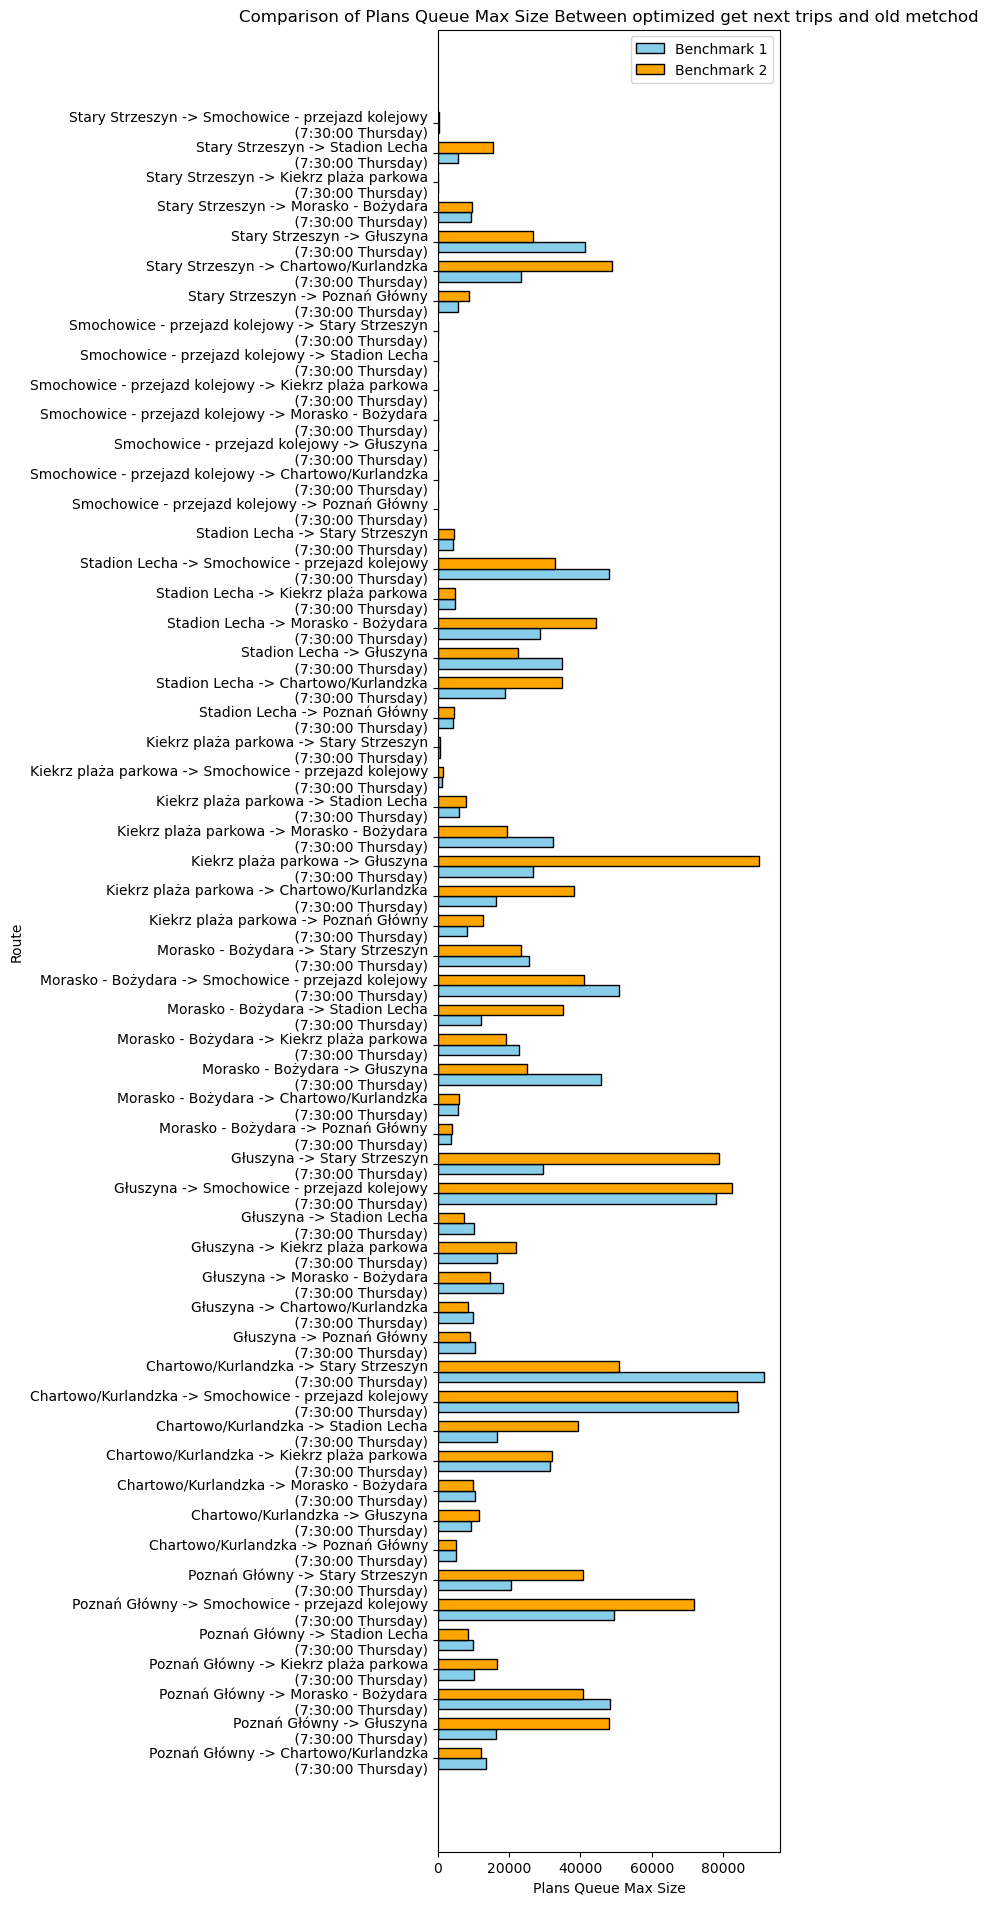

In [11]:
# Plotting
fig, ax = plt.subplots(figsize=(8, fig_height*1.3))

# Bar width
bar_width = 0.35
index = np.arange(len(df1))

# Create bars for plans_queue_max_size from the first DataFrame
bars1 = ax.barh(index - bar_width/2, df1['plans_queue_max_size'], bar_width, label='Benchmark 1', color='skyblue', edgecolor='black')

# Create bars for plans_queue_max_size from the second DataFrame
bars2 = ax.barh(index + bar_width/2, df2['plans_queue_max_size'], bar_width, label='Benchmark 2', color='orange', edgecolor='black')

# Add labels and title
ax.set_xlabel('Plans Queue Max Size')
ax.set_ylabel('Route')
ax.set_title(f'Comparison of Plans Queue Max Size Between {benchmark_1_name} and {benchmark_2_name}')
ax.set_yticks(index)
ax.set_yticklabels(df1['Label'])
ax.legend()

plt.tight_layout()
plt.show()

## Distribution of cost metrics

In [12]:
def plot_distribution_histogram(metric, title, xlabel):
    plt.figure(figsize=(14, 8))

    sns.histplot(df2[metric], color='orange', label=f'{benchmark_2_name}', stat="density", linewidth=0, alpha=0.3, bins=20)
    sns.histplot(df1[metric], color='skyblue', label=f'{benchmark_1_name}', stat="density", linewidth=0, alpha=0.4, bins = 20)

    sns.kdeplot(df2[metric], color='orange', lw=5)
    sns.kdeplot(df1[metric], color='skyblue', lw=5)

    median1 = df1[metric].median()
    mean1 = df1[metric].mean()
    plt.axvline(median1, color='skyblue', linestyle='--', linewidth=2, label=f'{benchmark_1_name} Median (ms): {round(median1)}')
    plt.axvline(mean1, color='skyblue', linestyle='-', linewidth=2, label=f'{benchmark_1_name} Mean (ms): {round(mean1)}')

    median2 = df2[metric].median()
    mean2 = df2[metric].mean()
    plt.axvline(median2, color='orange', linestyle='--', linewidth=2, label=f'{benchmark_2_name} Median (ms): {round(median2)}')
    plt.axvline(mean2, color='orange', linestyle='-', linewidth=2, label=f'{benchmark_2_name} Mean (ms): {round(mean2)}')

    plt.gca().set_yticklabels([])
    plt.xlim(left=0)
    plt.xlabel(xlabel)
    #plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    plt.tight_layout()
    plt.show()

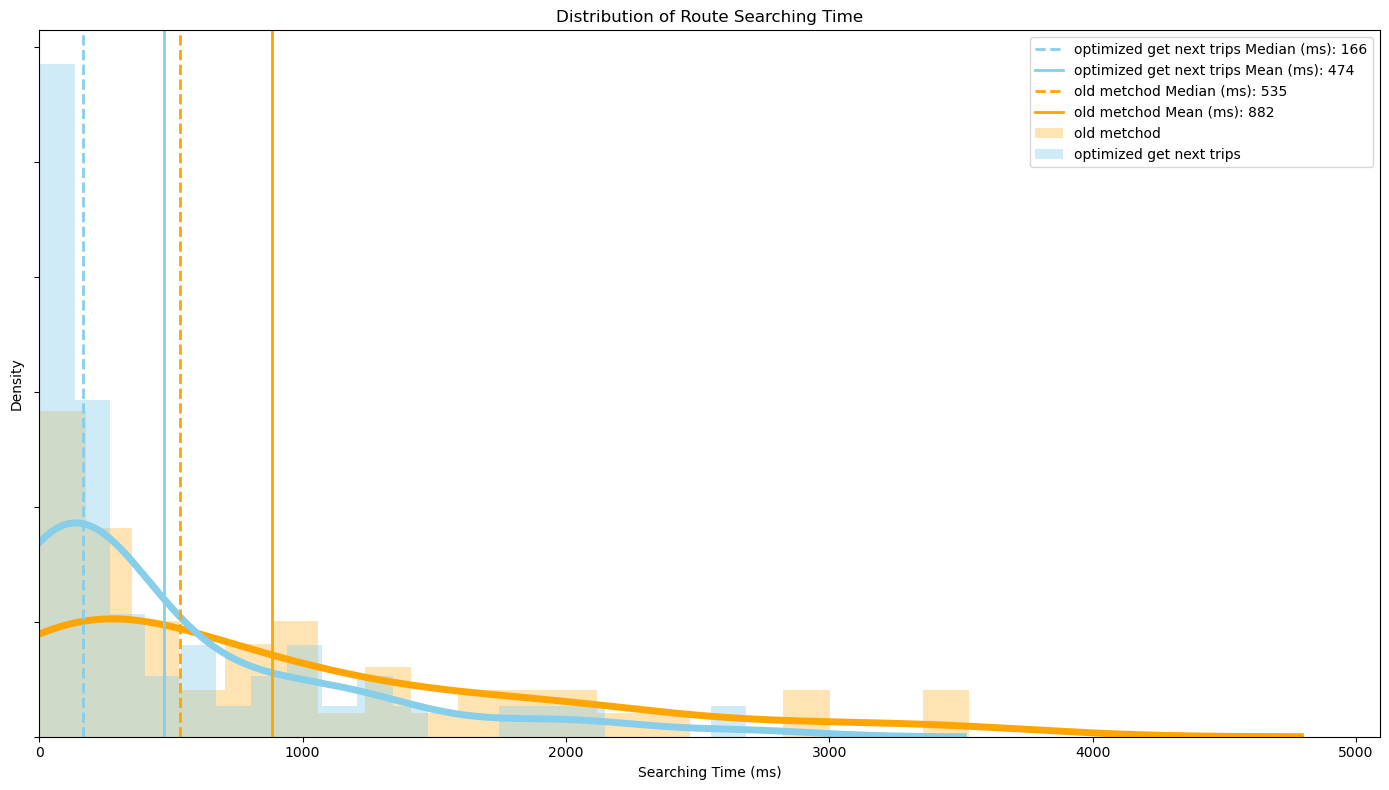

In [13]:
plot_distribution_histogram(
    metric='find_plans_time_total', 
    title='Distribution of Route Searching Time', 
    xlabel='Searching Time (ms)', 
)

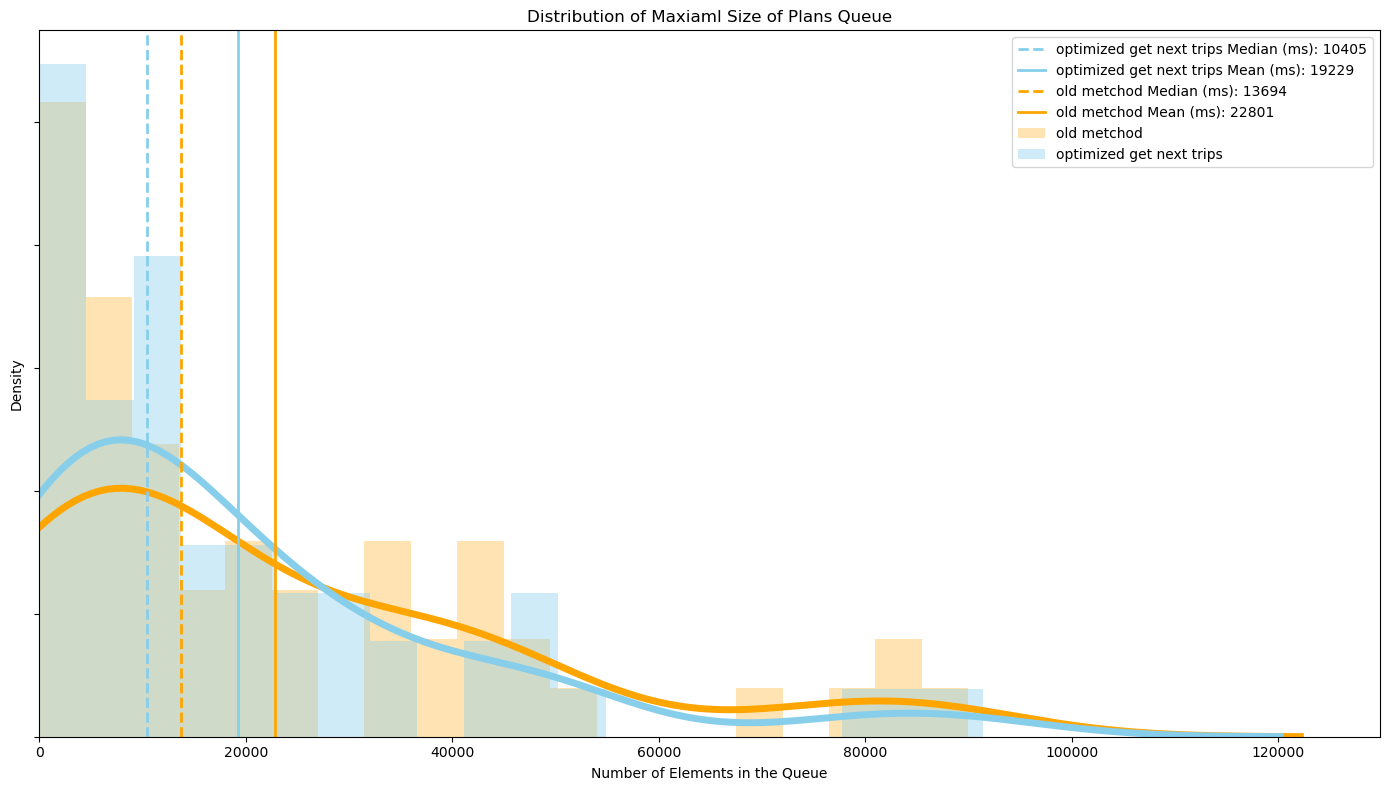

In [14]:
plot_distribution_histogram(
    metric='plans_queue_max_size', 
    title='Distribution of Maxiaml Size of Plans Queue', 
    xlabel='Number of Elements in the Queue', 
)

## Iterations

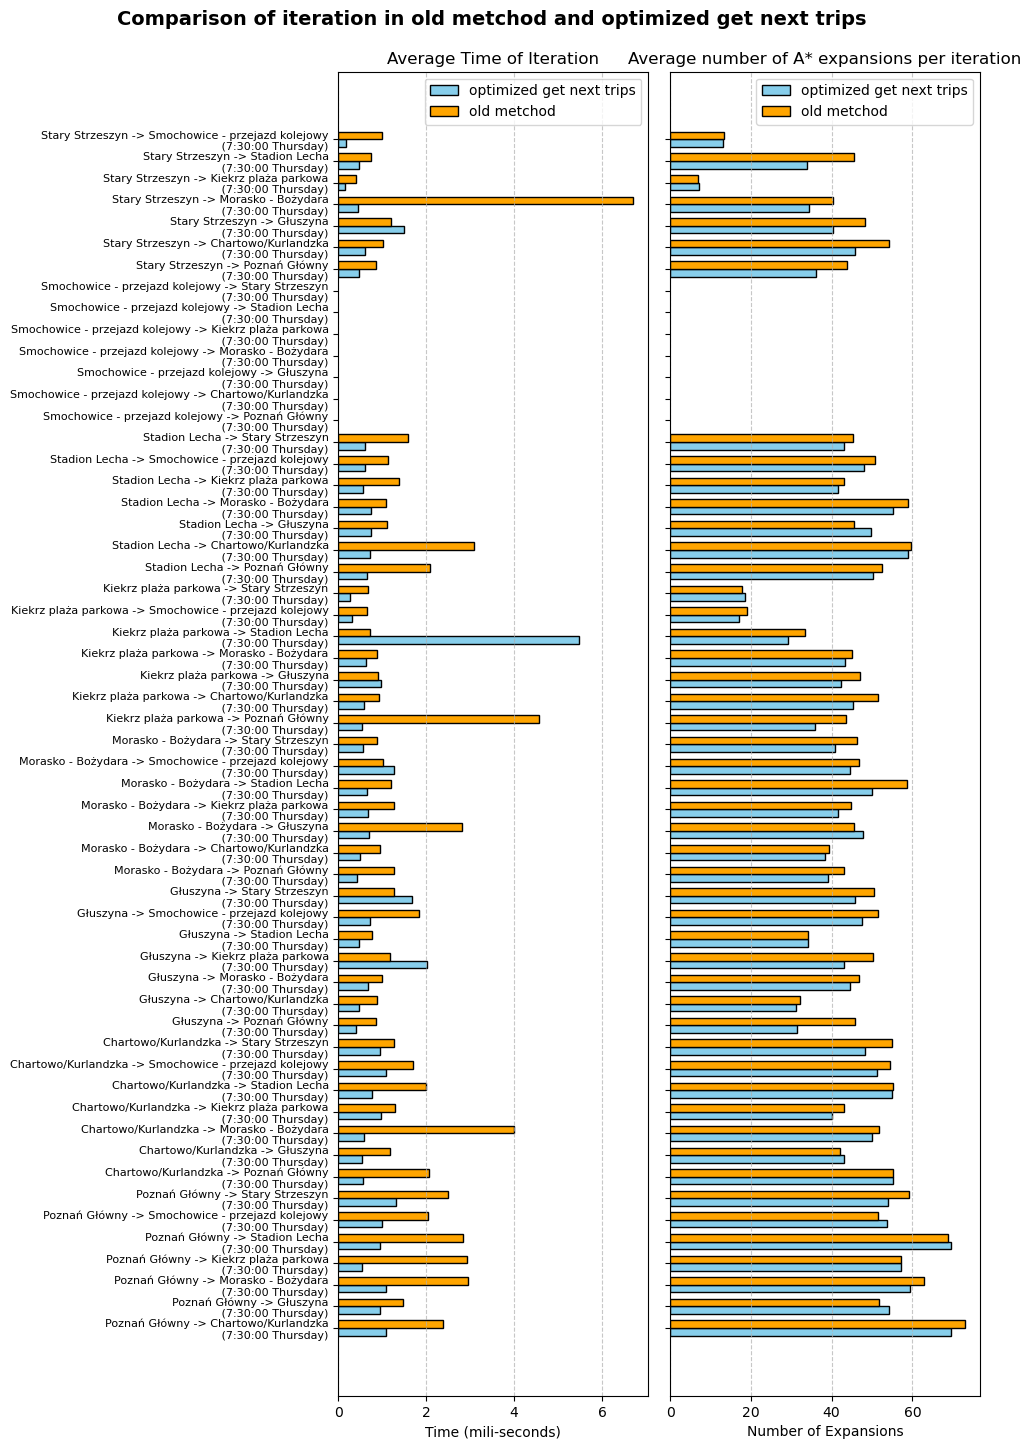

In [15]:
def plot_avg_per_iteration(metric_name_in_df, title, xlabel, ax):
    df1[f'{metric_name_in_df}_divided_by_no_iterations'] = df1[metric_name_in_df] / df1['iterations']
    df2[f'{metric_name_in_df}_divided_by_no_iterations'] = df2[metric_name_in_df] / df2['iterations']

    bar_width = 0.35
    index = np.arange(len(df1))

    bars1 = ax.barh(index - bar_width/2, df1[f'{metric_name_in_df}_divided_by_no_iterations'], bar_width, label=f'{benchmark_1_name}', color='skyblue', edgecolor='black')
    bars2 = ax.barh(index + bar_width/2, df2[f'{metric_name_in_df}_divided_by_no_iterations'], bar_width, label=f'{benchmark_2_name}', color='orange', edgecolor='black')

    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_yticks(index)
    ax.set_yticklabels(df1['Label'], fontsize=8)
    ax.legend()

    ax.grid(axis='x', linestyle='--', alpha=0.7)

fig, axes = plt.subplots(1, 2, figsize=(10, fig_height*1), sharey=True)

plot_avg_per_iteration(
    'find_plans_time_total',
    f'Average Time of Iteration', 
    'Time (mili-seconds)',
    ax=axes[0])

plot_avg_per_iteration(
    'expansions_total', 
    f'Average number of A* expansions per iteration', 
    'Number of Expansions',
    ax=axes[1])

fig.suptitle(f'Comparison of iteration in {benchmark_2_name} and {benchmark_1_name} \n', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Saving analysis to PDF

In [16]:
def save_notebook():
    display(Javascript("IPython.notebook.save_checkpoint();"))
save_notebook()
# Load the current notebook
notebook_filename = 'two_benchmarks_comparison.ipynb'
with open(notebook_filename) as f:
    nb = nbformat.read(f, as_version=4)

# Create a deep copy of the notebook to modify for export
nb_copy = copy.deepcopy(nb)

# Remove inputs of cells with 'hide_code' or 'hide_markdown' tags in the copy
nb_copy['cells'] = [cell for cell in nb_copy['cells'] if not (
    'tags' in cell['metadata'] and
    ('hide_all' in cell['metadata']['tags'] or 'hide_markdown' in cell['metadata']['tags'])
)]
for cell in nb_copy['cells']:
    if 'tags' in cell['metadata']:
        if 'hide_code' in cell['metadata']['tags']:
            cell['source'] = ''  # Clear the source to hide the input

# Configure the HTML exporter
html_exporter = HTMLExporter()

# Export the modified notebook copy to HTML
html_data, resources = html_exporter.from_notebook_node(nb_copy)

# Create the directory if it does not exist
output_dir = 'data_analysis_results'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the HTML to a file in the specified directory
html_filename = os.path.join(output_dir, filename + '.html')
with open(html_filename, 'w') as f:
    f.write(html_data)

print(f'Notebook has been converted to HTML and saved as {html_filename}')

<IPython.core.display.Javascript object>

Notebook has been converted to HTML and saved as data_analysis_results\optimized get next trips_vs_old metchod_analysis.html
